In [1]:
#CHROMA KEYING EFFECT
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Read images
!gdown https://drive.google.com/uc?id=1GqclC5OlPQaqPQ1Zq7ZQQfN9eOwqlPpD
!gdown https://drive.google.com/uc?id=1Mke16XA4g32lcWk6jYc5Vps-CBZKiDoI
!gdown https://drive.google.com/uc?id=1opv-5sqTL8Vq1Xg7w1K9E2fBy_Nh7tVD

Downloading...
From: https://drive.google.com/uc?id=1GqclC5OlPQaqPQ1Zq7ZQQfN9eOwqlPpD
To: /content/blue_tree.png
100% 18.2k/18.2k [00:00<00:00, 30.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Mke16XA4g32lcWk6jYc5Vps-CBZKiDoI
To: /content/tree_bg.png
100% 367k/367k [00:00<00:00, 48.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1opv-5sqTL8Vq1Xg7w1K9E2fBy_Nh7tVD
To: /content/tree.png
100% 41.9k/41.9k [00:00<00:00, 15.5MB/s]


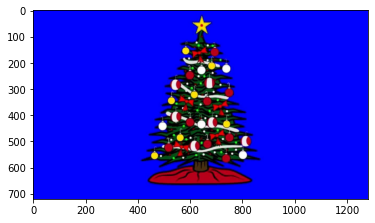

In [13]:
#Threshold for Image- Isolate Image
image = cv2.imread('./tree.png')
image_copy = np.copy(image) #copy of array

#Make sure its RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)


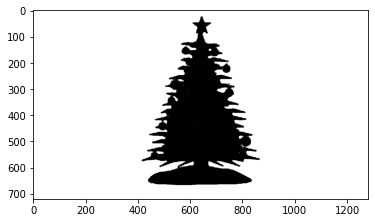

In [12]:
#Isolate
lower_blue = np.array([0, 0, 100])     ##[R value, G value, B value]
upper_blue = np.array([120, 100, 255])

#Do a Reverse Binary is tresh_min < src(x,y) < thresh_max then dst(x,y) = 0 else dst(x, y) = 255
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')

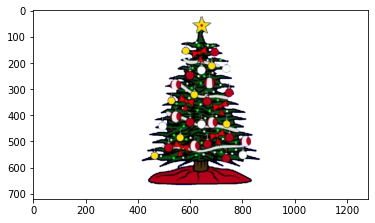

In [33]:
#Show tree and put white to black
masked_image = np.copy(image_copy)
#Cojemos la imagen original y en los pixels donde dio la mascara blanco vamos a ponerla negrra basicamente.....
masked_image[mask != 0] = [255, 255, 255]
plt.imshow(masked_image)

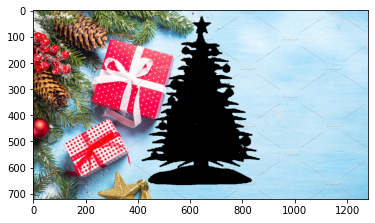

In [34]:
#Add new background
bg = cv2.imread('./tree_bg.png')
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)

#Resize
crop_background = bg[0:720, 0:1280]#Resize champet

#Donde la mascara fue 0 pintamos esos pixeles basicamente....
crop_background[mask == 0] = [0, 0, 0]

plt.imshow(crop_background)

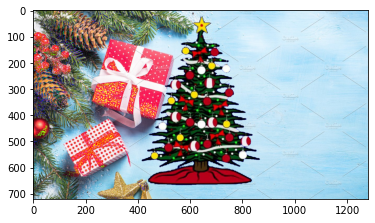

In [35]:
#Use matting FOREGROUND + BACKGROUND
final_image = crop_background + masked_image
plt.imshow(final_image)